## Predicting heart disease using machine learing


1. Data
2. Evaluation
3. Feautres
4. Modelling
5. Experimentation

## Problem definiton  : 
In a statement,
> Given clinical parameters about a patient, can we predict
          whether or not they have heart disease

## 1.Data && Features
1. age
2. sex (1 = male; 0 = female)
3. chest pain type (4 values) 
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target 1 or 0

## 2.Evaluation

>If we can reach 95% accuracy at predicting whehter or not a patient has heart disease during the proof of concept, we'll pursue the project

## Preparing the tools

We're goint to use pandas,Matplotlib and Numpy for data analysis and  manipualation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score ,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [2]:

df = pd.read_csv("heart.csv")

In [3]:
df.shape #(rows,columns)

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

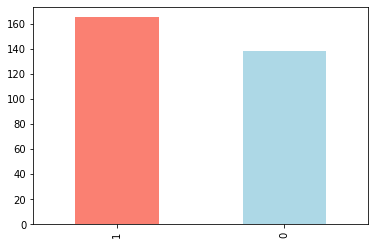

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequwncy according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


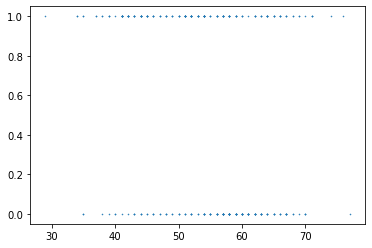

In [12]:
figg , axe = plt.subplots()
axe.scatter(df.age,df.target,s=0.3);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## age vs max heart rate for heart disease

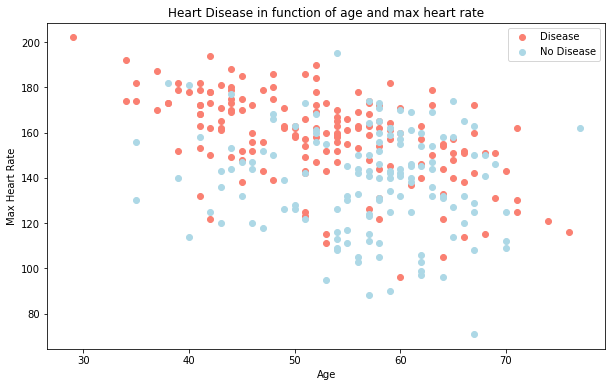

In [14]:
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df["target"]==1],df["thalach"][df["target"]==1],c="salmon")
# scatter with negative example
plt.scatter(df.age[df["target"]==0],df["thalach"][df["target"]==0],c="lightblue");

## add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


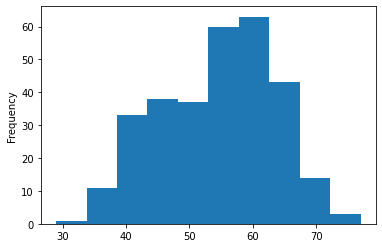

In [15]:
## check the distribution of the age column with a histogram
df.age.plot.hist();

##  Heart Disease Frequency per chest paint type

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


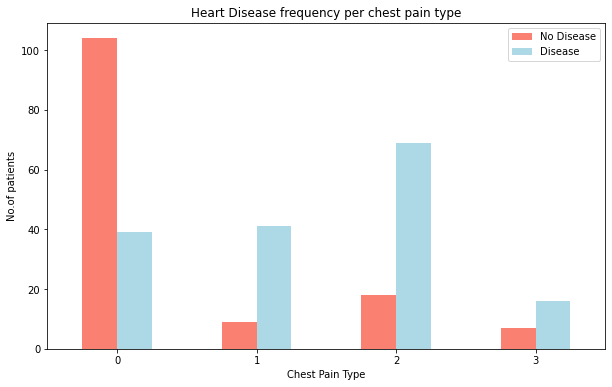

In [17]:
# make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"]);
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("No.of patients")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correleation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


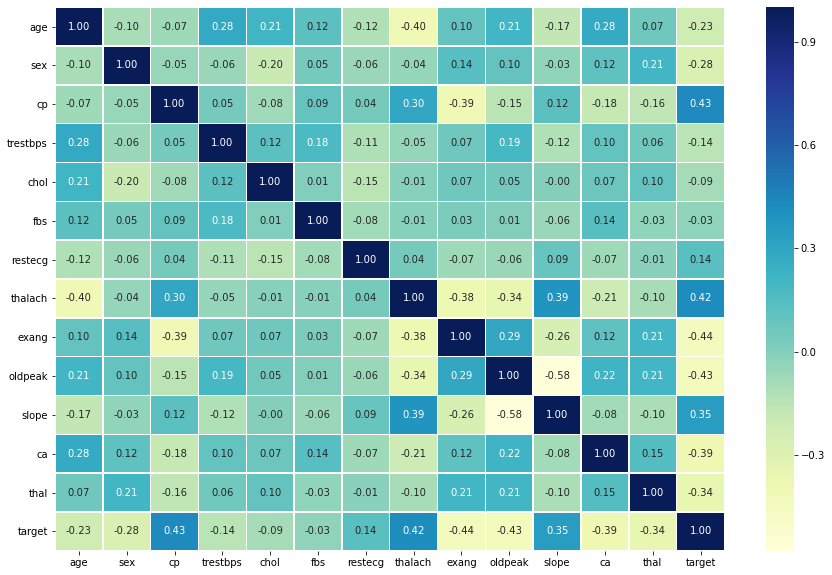

In [20]:
import seaborn as sns
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## MODELLING

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
##split data into x and y
X = df.drop("target",axis=1)

In [24]:
Y = df["target"]

In [25]:
np.random.seed(55)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3


In [27]:
y_train,len(y_train)

(33     1
 230    0
 38     1
 111    1
 278    0
       ..
 161    1
 37     1
 29     1
 295    0
 154    1
 Name: target, Length: 242, dtype: int64, 242)

## Trying 3 different machine learning models
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [28]:
## put models in a dictionary
models = {"logistic":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

In [29]:
#Create a Function to fit and score models
# def fit_and_score(models,x_train,x_test,y_train,y_test):
#     np.random.seed(55)
#     model_scores = {}
#     for name,model in models.items():
#         print(name)
#         model.fit(x_train,y_train)
#         model_scores[name] = model.score(x_test,y_test)
        
        
#     return model_scores
        

In [30]:
# model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

In [31]:
# model_scores

In [33]:
# model_compare = pd.DataFrame(model_scores,index=["accuracy"])
# model_compare.T.plot.bar();
# plt.xticks(rotation=0);

Lets look at the following

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

## Hyper Parameter tuning

In [34]:
# lets tune KNN
train_scores = []
test_scores =[]

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [35]:
train_scores

[1.0,
 0.7975206611570248,
 0.7727272727272727,
 0.7479338842975206,
 0.7603305785123967,
 0.7603305785123967,
 0.743801652892562,
 0.743801652892562,
 0.7396694214876033,
 0.7107438016528925,
 0.7024793388429752,
 0.7148760330578512,
 0.6859504132231405,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.6776859504132231,
 0.6776859504132231,
 0.6818181818181818,
 0.6900826446280992]

In [36]:
test_scores

[0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6885245901639344,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361]

Maximum KNN score on the test data:73.77%


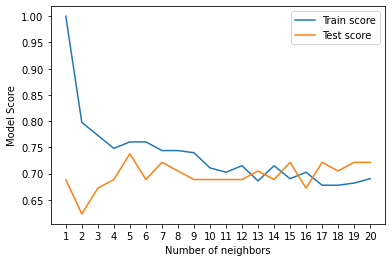

In [37]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

## Hyper parameter tuning with RandomizedSearchCv

We're going to tune:
* LogisticRegression( )
* RandomForestClassifier( )

In [38]:
# create a hyper parameter gird for logistic regression

log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
# for random forest
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)
          }

In [39]:
#tune logistic regression
# np.random.seed(56)
# rs_log_reg = RandomizedSearchCV(LogisticRegression(),
#                                param_distributions=log_reg_grid,
#                                cv=5,
#                                n_iter=20,
#                                verbose =True)
# rs_log_reg.fit(x_train,y_train)

In [41]:
# rs_log_reg.best_params_

In [42]:
# rs_log_reg.score(x_test,y_test)

In [43]:
#now its time for random forest classifier
np.random.seed(55)
rs_rf_tree = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                           cv=5,
                           n_iter=200,
                           verbose =True)
rs_rf_tree.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  7.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_rf_tree.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [45]:
rs_rf_tree.score(x_test,y_test)

0.8688524590163934

In [46]:
rs_rf_tree.score(x_test,y_test)

0.8688524590163934

## grid search cv  for logistic regression

In [81]:
#
log_reg_grid = { "solver":["liblinear"]
              }

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True,
                         )

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear']}, verbose=True)

In [82]:
gs_log_reg.best_params_

{'solver': 'liblinear'}

In [83]:
gs_log_reg.score(x_test,y_test)

0.8360655737704918

## Grid search for random forest

In [53]:
# gs_rf_tree = GridSearchCV(RandomForestClassifier(),
#                          param_grid=rf_grid,
#                          cv=5,
#                          verbose=True,
#                           n_jobs=-1
#                          )

# gs_rf_tree.fit(x_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [48]:
import joblib

In [55]:
joblib.dump(gs_rf_tree,"final_tree_model.sav")

['final_tree_model.sav']

In [56]:
gs_rf_tree.best_params_

{'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 60}

In [57]:
gs_rf_tree.score(x_test,y_test)

0.8360655737704918

In [58]:
gs_rf_tree.score(x_train,y_train)

0.8677685950413223

In [49]:
gs_rf_tree = joblib.load("final_tree_model.sav")

## Evaluation our tuned machine learning classifier , beyond accuracy

* ROC curve and AUC score
* Condusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

In [84]:
y_preds =gs_log_reg.predict(x_test)

In [85]:
y_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

## import Roc curve from sklearn and plot roc curve and calculte auc metrix

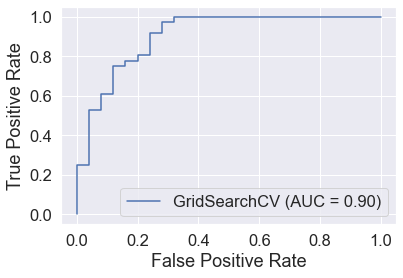

In [86]:
plot_roc_curve(gs_log_reg,x_test,y_test)

## Confusion matrix

In [87]:
print(confusion_matrix(y_test,y_preds))

[[18  7]
 [ 3 33]]


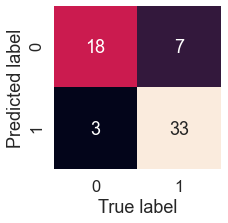

In [88]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax= plt.subplots(figsize=(3,3))
    
    
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_preds)

## lets get classification repopt as wekk as cross-validated precision,recall and f1-score

In [89]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



## Calculate evaluaiton metrics using cross-validation

we are going to use cross_val_score

In [90]:
# check best hyperparameters
gs_log_reg.best_params_

{'solver': 'liblinear'}

In [91]:
clf = LogisticRegression(solver= 'liblinear')

In [105]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc
cv1 = np.mean(cv_acc)
cv1

0.8215300546448088

In [107]:
#Cross validated precision
cv_pre = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre
cv2 = np.mean(cv_pre)
cv2

0.817900063251107

In [108]:
#Cross validated recall
cv_re=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_re
cv3 = np.mean(cv_re)
cv3

0.8727272727272727

In [106]:
#Cross validated f1-score
cv_f1_score=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1_score
cv4 = np.mean(cv_f1_score)
cv4

0.8431741323998502

## visulaize cross validated score

In [111]:
cv_metrics = pd.DataFrame({"Accuracy":cv1,
                          "precision":cv2,
                          "recall":cv3,
                          "f1_score":cv4},index=[0])

In [117]:
cv_metrics

,Accuracy,precision,recall,f1_score
0,0.82153,0.8179,0.872727,0.843174


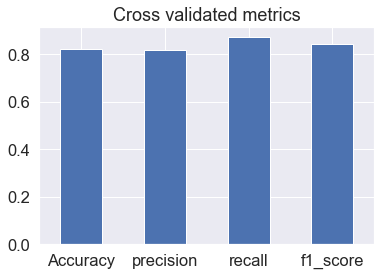

In [120]:
cv_metrics.T.plot.bar(title="Cross validated metrics",legend=False);
plt.xticks(rotation=0);

## Features importace

which features contributed most to the target

In [121]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [122]:
# fit an instance of LogisticRegression
clf =LogisticRegression(solver= 'liblinear')

clf.fit(x_train,y_train)


LogisticRegression(solver='liblinear')

## coef_

In [123]:
clf.coef_

array([[ 0.020637  , -1.35376708,  0.77105035, -0.0179672 , -0.00730529,
        -0.21364035,  0.40209549,  0.03392552, -0.69929553, -0.50245945,
         0.33831491, -0.65468559, -0.77896888]])

In [124]:
# Match coef's of features of columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [125]:
feature_dict

{'age': 0.020636999748834924,
 'sex': -1.3537670832527313,
 'cp': 0.7710503505359646,
 'trestbps': -0.01796719963538043,
 'chol': -0.007305291579939905,
 'fbs': -0.21364034819147132,
 'restecg': 0.4020954862377237,
 'thalach': 0.03392551877435036,
 'exang': -0.6992955325288198,
 'oldpeak': -0.5024594494611241,
 'slope': 0.3383149092924884,
 'ca': -0.6546855934456568,
 'thal': -0.7789688785214258}

In [127]:
feature_df = pd.DataFrame(feature_dict,index=[0])

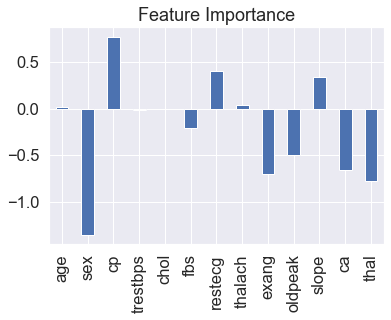

In [129]:
feature_df.T.plot.bar(title="Feature Importance",legend=False);